# Getting started with `matplotlib`

Matplotlib is the most used plotting package
in python. It was designed to mimic the plotting
syntax and functionality from Matlab, hence
the name matplotlib.

Just like when we imported numpy "as np"
it is standard to have two separate imports
with simplified aliases 

The base `mpl` import is used for high level 
settings like setting a default figure or font
size. The import of `plt` provides the main 
interface to the actual plotting functions.

To begin, we define the same air pressure
function as well as import numpy. Numpy and
matplotlib have been designed to work very 
well together

Just like with numpy, matplotlib is a very
large and general purpose library so we won't
be able to cover everything.

The introductory tutorials can be  found here: 
https://matplotlib.org/stable/tutorials/introductory/index.html#

In [1]:
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def air_pressure_at_height(h, T0=273):
    p0 = 101325      # reference pressure in pascals
    M = 0.02896968   # molar mass of air kg/mol
    g = 9.81         # gravity m/s^2
    R0 = 8.314462618 # gas constant J/(mol·K) 
    T = T0           # temp in kelvin

    ratio = -(g * h * M) / (R0 * T)
    p_h = p0 * np.exp(ratio)
    return p_h

Okay, our first plot will be the variation
of the air pressure with respect to elevation.
To do this, we will first create our two arrays,
one for the elevations and then we feed that
into our nice function just like in the previous
notebook.

From there we can just use the `plt.plot`
function to make the plot. Pretty nifty!

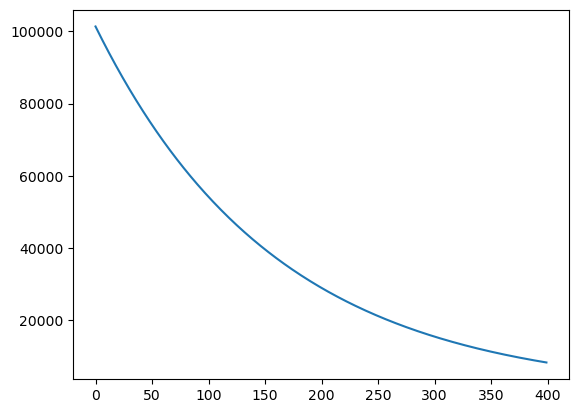

In [2]:
heights = np.arange(0, 20000, 50)
pressures = air_pressure_at_height(heights)

plt.plot(pressures)

Hmmm, something is going on with that x axis.
It only shows up to 400 but our heights array
goes to 20,000! What's going on there? We only
gave the plot function the pressures, so it knows
nothing about the heights. By default matplotlib
will just label the x axis with 0 to N where N
is the length of the array you passed in to the 
plot function.

To get both, you can optionally pass in both
what you want on the x axis *and* what you 
want on the y axis.

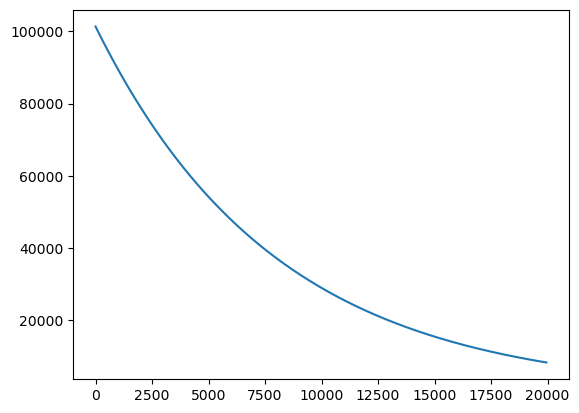

In [3]:
plt.plot(heights, pressures)

One problem though. If you gave this plot
to a colleague they would have no clue what it
is telling them. To help them out let's add some
axis labels. This can be done with the `plt.xlabel`
and `plt.ylabel` functions. Matplotlib automatically
knows to put them on the current plot.

Text(0, 0.5, 'Air pressure [pa]')

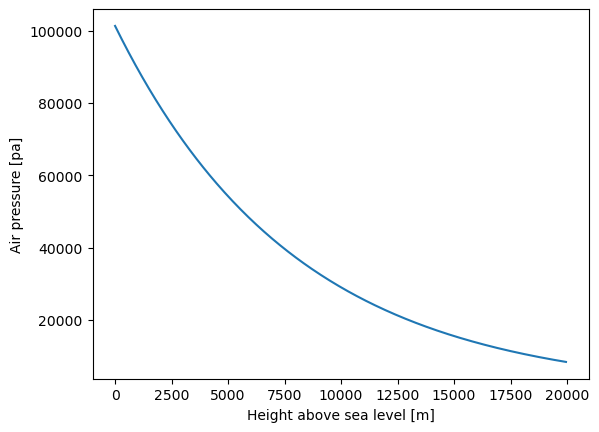

In [4]:
plt.plot(heights, pressures)
plt.xlabel('Height above sea level [m]')
plt.ylabel('Air pressure [pa]')

Beautiful! But, we're not done yet. If you've looked
closely at the function for the air pressure you might
have noticed we added a new argument `T0` with a default
argument of 273.15. By a default argument we mean that 
if you don't supply an alternative, it sets that one as
the value. But we know air pressure is a function of 
temperature and so we might want to see how that affects
things. Let's try a few and plot them.

To do that we just need to run a few new calculations, 
and then call the `plt.plot` function on each of the 
results.

Text(0, 0.5, 'Air pressure [pa]')

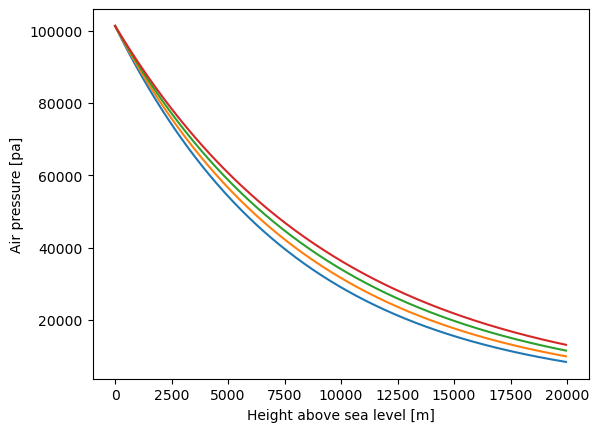

In [5]:
p_273 = air_pressure_at_height(heights)
p_293 = air_pressure_at_height(heights, T0=293)
p_313 = air_pressure_at_height(heights, T0=313)
p_333 = air_pressure_at_height(heights, T0=333)

plt.plot(heights, p_273)
plt.plot(heights, p_293)
plt.plot(heights, p_313)
plt.plot(heights, p_333)

plt.xlabel('Height above sea level [m]')
plt.ylabel('Air pressure [pa]')

This is awesome, but we're back to the fact that
if you handed this to someone else they would not have 
a way of knowing what the different lines are for.
We can remedy this by adding `label`s to each of the calls
to `plt.plot`. Once those have been added we just call
`plt.legend()` after we are done plotting the lines to
add it to the figure

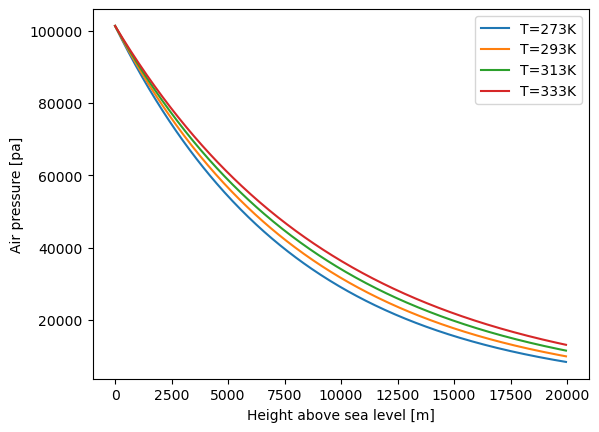

In [6]:
p_273 = air_pressure_at_height(heights)
p_293 = air_pressure_at_height(heights, T0=293)
p_313 = air_pressure_at_height(heights, T0=313)
p_333 = air_pressure_at_height(heights, T0=333)

plt.plot(heights, p_273, label='T=273K')
plt.plot(heights, p_293, label='T=293K')
plt.plot(heights, p_313, label='T=313K')
plt.plot(heights, p_333, label='T=333K')

plt.xlabel('Height above sea level [m]')
plt.ylabel('Air pressure [pa]')
plt.legend()

A final step on this particular plot. You can use
all of this functionality in loops so that your code
is a bit shorter and easier to modify. Let's look at
how

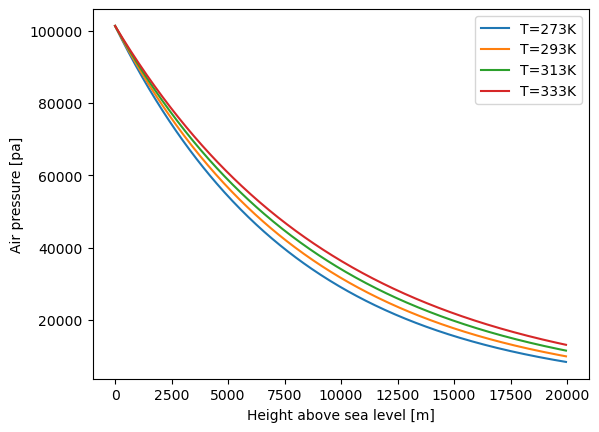

In [7]:
temps = [273, 293, 313, 333]
for T in temps:
    p_temp = air_pressure_at_height(heights, T0=T)
    plt.plot(heights, p_temp, label='T='+str(T)+'K')

plt.xlabel('Height above sea level [m]')
plt.ylabel('Air pressure [pa]')
plt.legend()

Okay, line plots are cool, but what else can
matplotlib do? Let's look at images. So for this
one we'll first run the air pressure function over
many different temperatures. 

We then `stack` the results of our loop, which just
makes the whole thing a numpy array rather than a 
list of numpy arrays. This is so matplotlib can 
interpret what we want. 

QUIZ: What's the resulting dimension of `pressures`
      after calling np.stack ?

Finally we call  `plt.colorbar` just so we know what
the values for the different colors are.

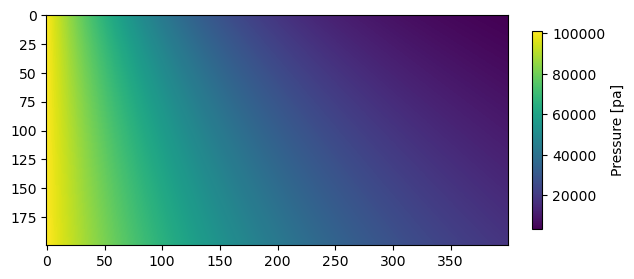

In [8]:
temps = np.arange(200, 400, 1)
pressures = []
for T in temps:
    p_new = air_pressure_at_height(heights, T0=T)
    pressures.append(p_new)

# Stack just sticks a list of numpy arrays 
# together along a new dimension
pressures = np.stack(pressures)
ax = plt.imshow(pressures)
plt.colorbar(
    fraction=0.02,  # Just shrinking the size of it
    label='Pressure [pa]'
)

Hmmm, now we're back to the problem where
we don't know what the x and y axes represent.
To fix this we'll need to get into a slightly more
complex way of plotting. This mode requires more code
but is better for flexibility. For exploratory analysis 
you can usually get away with just calling `plt.WHATEVER`
but this way of explicitly creating the `plt.figure` is
usually better for detailed plotting.

This one is a little bit complicated so it's okay if
it doesn't click right now, but I wanted to show it
because it is something common to need to make, but
a bit difficult, so I wanted to provide a reference.
This took me ~10 mins to re-figure out even though
I have been using matplotlib since ~2012.

Text(0, 0.5, 'Temperature [K]')

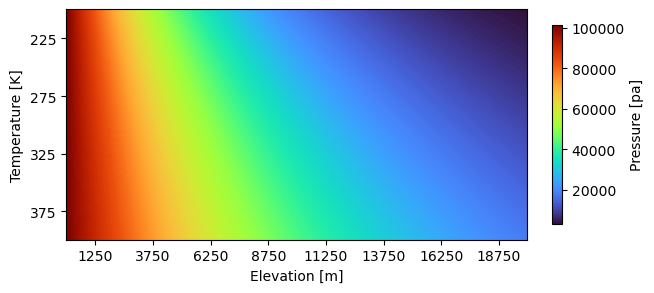

In [9]:
fig, ax = plt.subplots()

img = ax.imshow(pressures, cmap='turbo')
fig.colorbar(
    img, 
    fraction=0.02,
    label='Pressure [pa]'
)

# Ticks are where the labels are
# and ticklabels are what the labels are
xticks = np.arange(25, len(heights), 50)
ax.set_xticks(xticks)
ax.set_xticklabels(heights[xticks])
ax.set_xlabel('Elevation [m]')

# We do this for both the x and y dims
yticks = np.arange(25, len(temps), 50)
ax.set_yticks(yticks)
ax.set_yticklabels(temps[yticks])
ax.set_ylabel('Temperature [K]')
# %%